<h1> Installing dependencies </h1>

In [1]:
!pip install gymnasium
!pip install stable-baselines3[extra]

<h1> Creating the gym environment </h1>

In [3]:
import gymnasium as gym
from stable_baselines3 import PPO

In [10]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
print("Action Space : {}".format(env.observation_space.shape[0]))
print("State Space : {}".format(env.action_space.n))

Action Space : 4
State Space : 2


In [11]:
episodes = 10

terminated = False
truncated = False
env.reset()

for episode in range (1, episodes + 1):
    observation = env.reset()
    score = 0
    
    while True:
        env.render()
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        score += reward;
        if terminated or truncated:
            break;
     
    print("Episode {} score : {}".format(episode, score))
env.close()

Episode 1 score : 35.0
Episode 2 score : 11.0
Episode 3 score : 25.0
Episode 4 score : 66.0
Episode 5 score : 33.0
Episode 6 score : 18.0
Episode 7 score : 14.0
Episode 8 score : 44.0
Episode 9 score : 36.0
Episode 10 score : 43.0


<h1> Building and Training the model </h1>

In [12]:
import os
from stable_baselines3 import PPO

In [5]:
model = PPO("MlpPolicy", env, verbose = 1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
model.learn(total_timesteps=30000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | 22.9     |
| time/              |          |
|    fps             | 1445     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 23.9        |
|    ep_rew_mean          | 23.9        |
| time/                   |             |
|    fps                  | 941         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008806085 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | 0.00181     |
|    learning_rate        | 0.

KeyboardInterrupt: 

In [15]:
PPO_Path = os.path.join("Saved Models", "PPO")
model.save(PPO_Path)

In [18]:
episodes = 10
vec_env = model.get_env()

for episode in range(1, episodes+1):
    obs = vec_env.reset()
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = vec_env.step(action)
        vec_env.render("human")
        if done:
            print("Info: ", info)
            break;

#Hack to close window
import cv2
cv2.destroyAllWindows()

Info:  [{'episode': {'r': 500.0, 'l': 500, 't': 554.346642}, 'TimeLimit.truncated': True, 'terminal_observation': array([-1.1690886 , -0.01923447,  0.00231297, -0.04350284], dtype=float32)}]
Info:  [{'episode': {'r': 500.0, 'l': 500, 't': 557.701784}, 'TimeLimit.truncated': True, 'terminal_observation': array([-0.5523983 , -0.7778386 , -0.04768805,  0.7477158 ], dtype=float32)}]
Info:  [{'episode': {'r': 500.0, 'l': 500, 't': 560.977186}, 'TimeLimit.truncated': True, 'terminal_observation': array([-0.6894637 , -0.7953041 ,  0.03383806,  0.532456  ], dtype=float32)}]
Info:  [{'episode': {'r': 500.0, 'l': 500, 't': 564.380801}, 'TimeLimit.truncated': True, 'terminal_observation': array([-0.5856728 ,  0.3557707 , -0.01201877, -0.37184134], dtype=float32)}]
Info:  [{'episode': {'r': 500.0, 'l': 500, 't': 567.880263}, 'TimeLimit.truncated': True, 'terminal_observation': array([-0.57889163, -0.7126054 , -0.00279729,  0.72894955], dtype=float32)}]
Info:  [{'episode': {'r': 500.0, 'l': 500, 't

<h1> Task 1 </h1>

In [1]:
import os
import gymnasium as gym
from stable_baselines3 import PPO

env = gym.make("CartPole-v1", render_mode="rgb_array")
model = PPO.load("Saved Models\PPO", env=env)


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [2]:
vec_env = model.get_env()
obs = vec_env.reset()
action = model.predict(obs)[0]

print("Observation : {}".format(obs))
print("Action : {}".format(action))

Observation : [[ 0.00194425  0.0331521   0.04276385 -0.01847569]]
Action : [1]


<h1> Task 2 </h1>

In [3]:
episodes = 100
vec_env = model.get_env()
cumilative_rewards = []

for episode in range(1, episodes + 1):
    score = 0
    obs = vec_env.reset()
    
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = vec_env.step(action)
        score += reward
        
        if done:
            break;
    cumilative_rewards.append(score)

print(cumilative_rewards)

#Hack to close window
import cv2
cv2.destroyAllWindows()

[array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([500.], dtype=float32), array([50

<h3> Plotting our rewards </h3>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

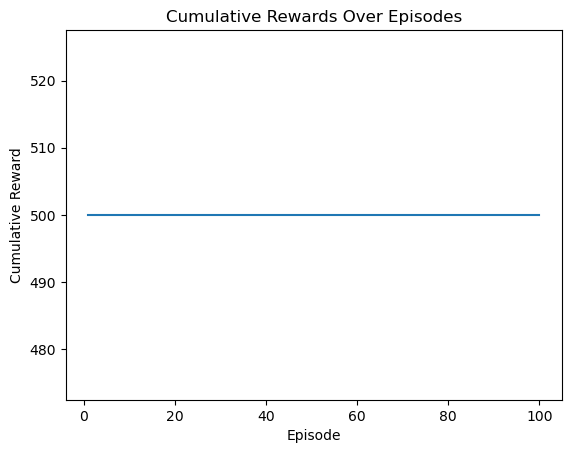

In [6]:
# Plot the cumulative rewards
plt.plot(range(1, episodes + 1), cumilative_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards Over Episodes')
plt.show()

<h1> Task 3 </h1>

In [ ]:
done = False
obs = vec_env.reset()

for i in range(1000):
    action, _ = 